In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
print("All packages are working")

All packages are working


In [2]:
# Load the dataset
titanic = pd.read_csv('TITANIC.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 1. What is the survival rate of passengers

# Calculate the survival rate

survival_rate = titanic["survived"].mean() * 100

# Display the current survival rate

print(f"Survival rate of passengers: {survival_rate:.2f}%")

Survival rate of passengers: 38.38%


sex
male      577
female    314
Name: count, dtype: int64


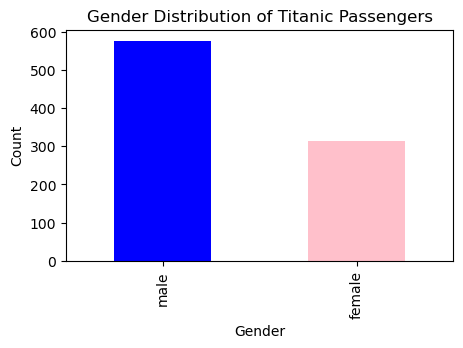

In [7]:
# 2.What is the gender distribution of passengers? 
# Count values for each gender

gender_counts = titanic["sex"].value_counts()

# Display results

print(gender_counts)

# Plot gender distribution
plt.figure(figsize=[5, 3])
gender_counts.plot(kind="bar", color=["blue", "pink"])
plt.title("Gender Distribution of Titanic Passengers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


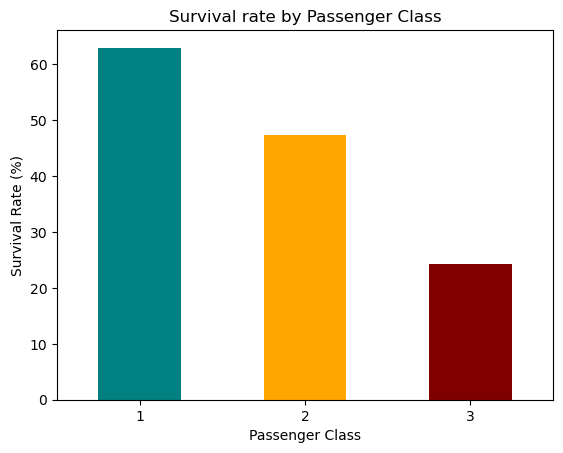

In [8]:
# 3. How does survival rate differ by class?

# Compute survival rate group by class

survival_by_class = titanic.groupby("pclass")["survived"].mean() * 100

# Display result
print(survival_by_class)

# Plot the survival rate distribution

survival_by_class.plot(kind="bar", color=["teal", "orange","maroon"])
plt.title("Survival rate by Passenger Class")
plt.xticks(rotation=0)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.show()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


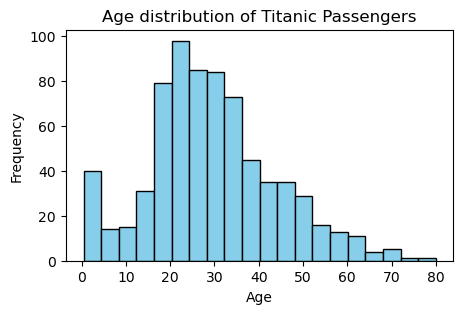

In [9]:
# 4. What is the distribution of passenger age?

# Summary statistics for age

print(titanic["age"].describe())

# Plot distribution of age

plt.figure(figsize=[5, 3])
plt.hist(titanic["age"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Age distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [10]:
# 5. How many passengers embarked from each location?

# Count passenger based on their embark location

embark_counts = titanic["embarked"].value_counts()

# Display result

print(embark_counts)

embarked
S    644
C    168
Q     77
Name: count, dtype: int64


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


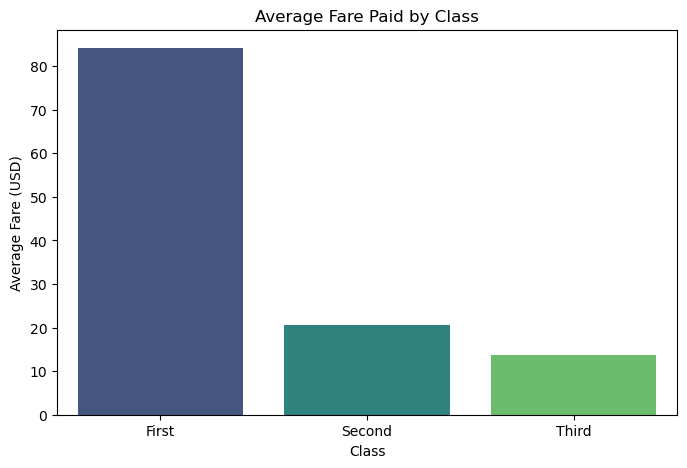

In [55]:
# 6. What is average fare paid by class?

# Compute average fare by class

avg_fare_by_class = titanic.groupby("class")["fare"].mean()

# Diaplay result

print(avg_fare_by_class)

# Convert Series to DataFrame for Seaborn compatibility
avg_fare_by_class = avg_fare_by_class.reset_index()

# Bar plot using calculated values
plt.figure(figsize=(8, 5))
sns.barplot(x="class", y="fare", hue="class", data=avg_fare_by_class, legend=False, palette="viridis")

# Formatting
plt.xlabel("Class")
plt.ylabel("Average Fare (USD)")
plt.title("Average Fare Paid by Class")
plt.xticks(rotation=0)
plt.show()




sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


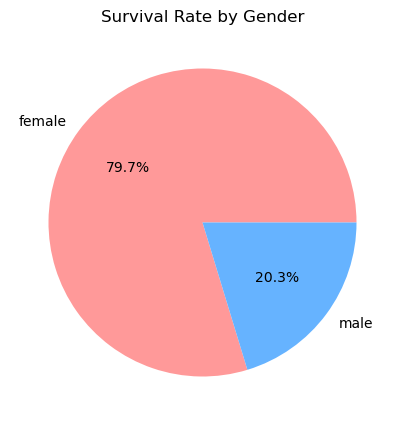

In [28]:
# 7. How does gender affect survival rates?

# Calculate survival rate by gender

survival_by_gender = titanic.groupby("sex")["survived"].mean()

# Display result

print(survival_by_gender)

# Define colors

colors=["#ff9999", "#66b3ff"]

# Plot pie chart to illustrate the differences

plt.figure(figsize=(5, 5))
plt.pie(survival_by_gender, labels=survival_by_gender.index, autopct="%1.1f%%", colors=colors)
plt.title("Survival Rate by Gender")
plt.show()

Correlation between Fare and Survival: 0.26


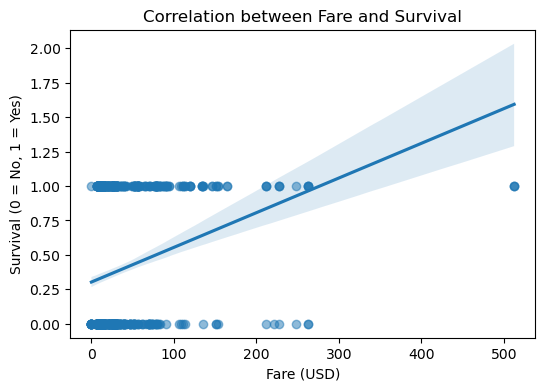

In [35]:
# 8. What is the correlation between fare and survival?

# Calculate correlation coefficient

correlation = titanic["fare"].corr(titanic["survived"])
# Display result

print(f"Correlation between Fare and Survival: {correlation:.2f}")

# Use Scatter Plot with regression line to visualize the relationship

plt.figure(figsize=(6, 4))
sns.regplot(x=titanic["fare"], y=titanic["survived"], scatter_kws={"alpha":0.5})
plt.title("Correlation between Fare and Survival")
plt.xlabel("Fare (USD)")
plt.ylabel("Survival (0 = No, 1 = Yes)")
plt.show()

sibsp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: survived, dtype: float64


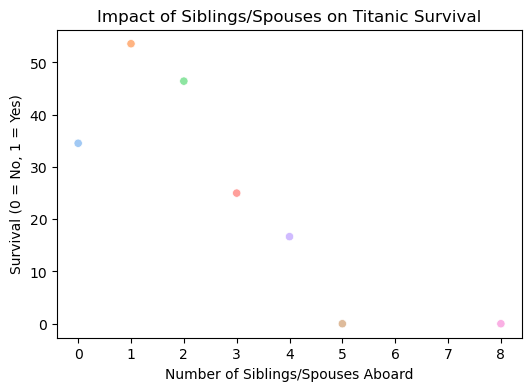

In [62]:
# 9. How does the number of siblings/spouses aboard affect survival?

# Calculate survival rates grouped by number of siblings and spouse aboard

survival_by_sibsp = titanic.groupby("sibsp")["survived"].mean() * 100

# Display result

print(survival_by_sibsp)

# Visualize using boxplot
survival_by_sibsp = survival_by_sibsp.reset_index()
plt.figure(figsize=(6, 4))
sns.scatterplot(x="sibsp", y="survived", data=survival_by_sibsp, hue="sibsp", legend=False, palette="pastel")  

# Formatting
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Survival (0 = No, 1 = Yes)")
plt.title("Impact of Siblings/Spouses on Titanic Survival")
plt.xticks(rotation=0)
plt.show()


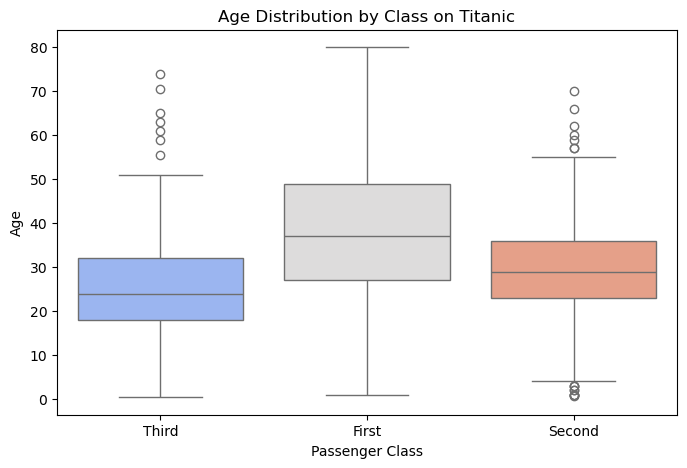

In [67]:
# What is the age distribution by class?

# Using Box plot to show age distribution by class
plt.figure(figsize=(8, 5))
sns.boxplot(x="class", y="age", hue="class", data=titanic, palette="coolwarm", legend=False)

# Formatting
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.title("Age Distribution by Class on Titanic")
plt.xticks(rotation=0)
plt.show()


  embarked  survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


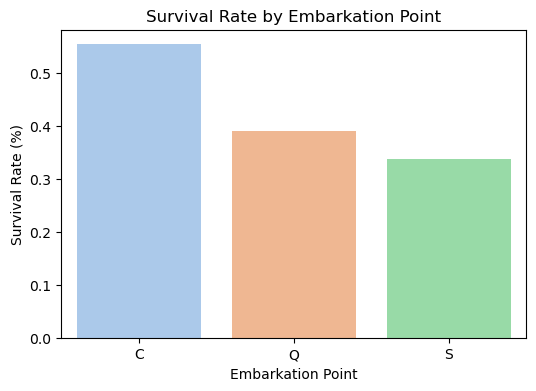

In [68]:
# 11. What is the survival rate by embarkation point?

survival_by_embark = titanic.groupby("embarked")["survived"].mean().reset_index()

# Displays survival rates for each embarkation point

print(survival_by_embark)  

# Using bar plot to Visualize survival by embarkation 
plt.figure(figsize=(6, 4))
sns.barplot(x="embarked", y="survived", hue="embarked", data=survival_by_embark, legend=False, palette="pastel")

# Formatting
plt.xlabel("Embarkation Point")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Embarkation Point")
plt.xticks(rotation=0)
plt.show()



   parch  survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


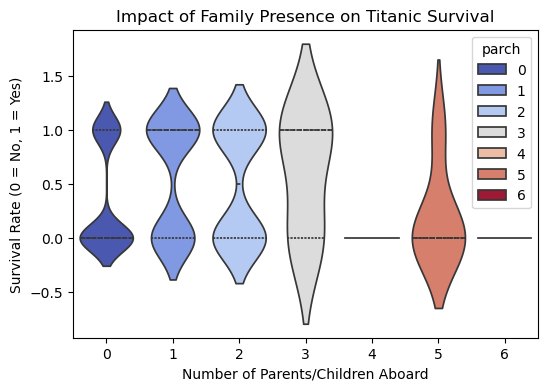

In [72]:
# 12. What is the impact of having parents/children aboard on survival?

# Calculate Survival Rate by Parent/Child Count

survival_by_parch = titanic.groupby("parch")["survived"].mean().reset_index()

print(survival_by_parch) 

# Using Violin Plot for Survival by Parch

plt.figure(figsize=(6, 4))
sns.violinplot(x="parch", y="survived", hue="parch", data=titanic, palette="coolwarm", inner="quartile")

# Formatting
plt.xlabel("Number of Parents/Children Aboard")
plt.ylabel("Survival Rate (0 = No, 1 = Yes)")
plt.title("Impact of Family Presence on Titanic Survival")
plt.xticks(rotation=0)
plt.show()
